# install packages

In [ ]:
%pip install fsspec
%pip install boto3
%pip install s3fs

In [38]:
%pip uninstall ezpackage -y
%pip install git+https://github.com/ezg/ezpackage.git --upgrade


Found existing installation: ezpackage 0.1.0
Uninstalling ezpackage-0.1.0:
  Successfully uninstalled ezpackage-0.1.0
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/ezg/ezpackage.git to /private/var/folders/r7/qgrdncks1gxb930m8zd002mh0000gn/T/pip-req-build-guh71pd7
  Running command git clone --filter=blob:none --quiet https://github.com/ezg/ezpackage.git /private/var/folders/r7/qgrdncks1gxb930m8zd002mh0000gn/T/pip-req-build-guh71pd7
  Resolved https://github.com/ezg/ezpackage.git to commit 4cf28719735463f973ddf9862dd3ecd25b72231d
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for ezpackage, since package 'wheel' is not installed.
  Running setup.py install for ezpackage ... done

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# data cleaning

In [34]:
import pandas as pd
df = pd.read_csv('s3://ez-testing-bucket/tracks.csv')
df = df[df["EVENT"] != "error"]

user_col = 'USER_ID'
event_col = 'EVENT'

In [40]:
import ezpackage

g1 = set(df[(df['USER_AGENT_BROWSER_OS'] == 'iOS') | (
    df['USER_AGENT_BROWSER_OS'] == 'Android OS')]['USER_ID'])
g2 = set(df['USER_ID']) - g1

#g1 = set(df[(df['EVENT'] == 'asset-shared') | (
#    df['EVENT'] == 'asset_shared')]['USER_ID'])
#g2 = set(df['USER_ID']) - g1


groups = ezpackage.funnel.funnel(data=df, targets=[
    'account_created',  'operator_created'], event_col=event_col, index_col=user_col, groups=(g1, g2),
    group_names=('mobile', 'non-mobile'))

#groups = ezpackage.funnel.funnel(data=df, targets=[
#    'dataset_created',  'operator_created'], event_col=event_col, index_col=user_col, groups=(g1, g2),
#    group_names=('shared', 'not-shared'))

fig = ezpackage.funnel.plot(groups)
fig.show()

0         6/25/22 7:11 PM
1         6/25/22 2:56 PM
2         6/25/22 7:15 PM
3        6/25/22 10:24 PM
4         6/25/22 5:03 PM
               ...       
32599     6/15/22 3:28 PM
32600    6/15/22 10:11 PM
32601     6/15/22 2:28 PM
32602     6/15/22 5:06 PM
32603     6/15/22 5:51 PM
Name: TIMESTAMP, Length: 32604, dtype: object


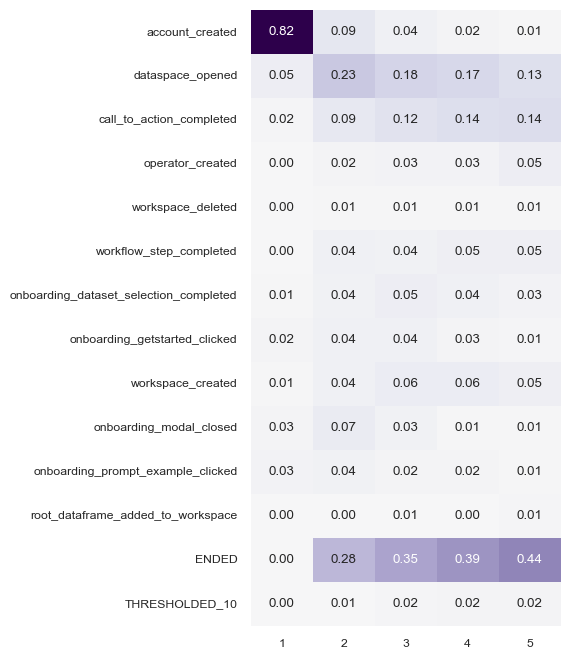

In [36]:
import matplotlib.pyplot as plt

df.sort_values(by='TIMESTAMP')
g1 = set(df[(df['USER_AGENT_BROWSER_OS'] == 'iOS') | (
    df['USER_AGENT_BROWSER_OS'] == 'Android OS')]['USER_ID'])
g2 = set(df['USER_ID']) - g1

user_col = 'USER_ID'
event_col = 'EVENT'
time_col = 'TIMESTAMP'

groups = ezpackage.matrix.matrix(
    df, max_steps=5, event_col=event_col, index_col=user_col, time_col=time_col, thresh=0.01)

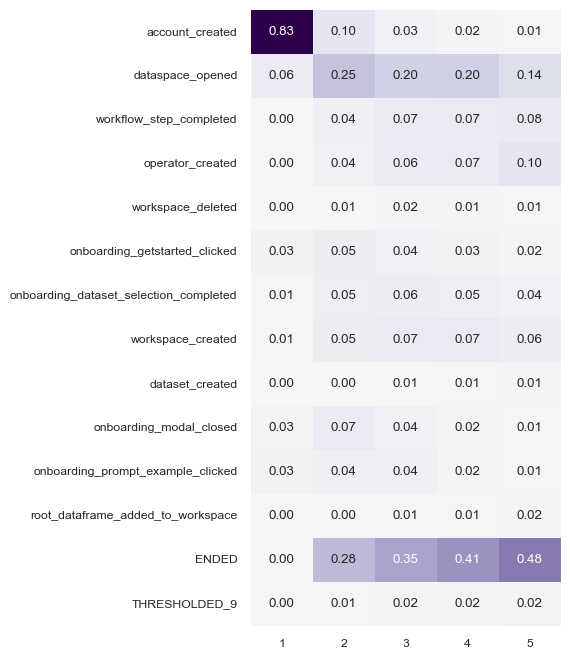

In [37]:
import matplotlib.pyplot as plt

df.sort_values(by='TIMESTAMP')

user_col = 'USER_ID'
event_col = 'EVENT'
time_col = 'TIMESTAMP'

sub = df[df["EVENT"] != "call_to_action_completed"]

groups = ezpackage.matrix.matrix(
    sub, max_steps=5, event_col=event_col, index_col=user_col, time_col=time_col, thresh=0.01)